In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)
print(df.head())


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [4]:
import pandas as pd
import random


def loadDataset(filename, split):
	trainingSet=[]
	testSet=[]
	df = pd.read_csv(url, header=None)
	array = df.to_numpy()
	random.shuffle(array)
	training_len = int(len(array)*split)
	trainingSet = array[:training_len]
	testSet = array[training_len:]
	return trainingSet, testSet

In [5]:
trainingSet=[]
testSet=[]
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
trainingSet, testSet = loadDataset(url, 0.66)

# repr() Return a string containing a printable representation
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))


Train: 99
Test: 51


In [6]:
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [7]:
data1 = [2, 2, 2, 2, 'a']
data2 = [4, 4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 4)
print('Distance: ' + repr(distance))

Distance: 4.0


In [8]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
    # key=operator.itemgetter(1) => order distances list based on second column (1)
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [9]:


trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5, 'b']
k = 1
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)



[[4, 4, 4, 'b']]


In [10]:
import operator
def getResponse(neighbors):
    # classVotes is a dict, similar to JSON
    # e.g., {'a': 1, 'b': 2}
	classVotes = {}
	for x in range(len(neighbors)):
        # based on the last element
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
    # reverse=True means the most voted item will be our response
    # itemgetter(1): get the first item, i.e. item with most votes
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [11]:
neighbors = [[1,1,1,1,'a'], [2,2,2,2,'a'], [3,3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


In [12]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [13]:
testSet = [[1,1,1,1,'a'], [2,2,2,2,'a'], [3,3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


K: 1, Mean of Accuracy:   40.7843137254902
K: 2, Mean of Accuracy:   41.96078431372549
K: 3, Mean of Accuracy:   43.52941176470589
K: 4, Mean of Accuracy:   43.13725490196079
K: 5, Mean of Accuracy:   41.568627450980394
K: 6, Mean of Accuracy:   39.6078431372549
K: 7, Mean of Accuracy:   36.86274509803921
K: 8, Mean of Accuracy:   42.352941176470594
K: 9, Mean of Accuracy:   36.86274509803921
K: 10, Mean of Accuracy:   40.7843137254902
K: 11, Mean of Accuracy:   41.5686274509804
K: 12, Mean of Accuracy:   40.7843137254902
K: 13, Mean of Accuracy:   36.86274509803921
K: 14, Mean of Accuracy:   38.431372549019606
K: 15, Mean of Accuracy:   36.86274509803921
K: 16, Mean of Accuracy:   39.2156862745098
K: 17, Mean of Accuracy:   36.47058823529412
K: 18, Mean of Accuracy:   40.7843137254902
K: 19, Mean of Accuracy:   37.25490196078431
K: 20, Mean of Accuracy:   37.25490196078431


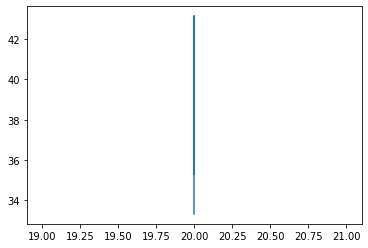

In [60]:
# Example of kNN implemented from Scratch in Python

import pandas as pd
import random
import math
import operator
import numpy as np
import matplotlib.pyplot as plt

def loadDataset(filename, split):
	trainingSet=[]
	testSet=[]
	df = pd.read_csv(url, header=None)
	array = df.to_numpy()
	random.shuffle(array)
	training_len = int(len(array)*split)
	trainingSet = array[:training_len]
	testSet = array[training_len:]
	return trainingSet, testSet


def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0
	
def main():
	# prepare data
	trainingSet=[]
	testSet=[]
	split = 0.67
	url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'

	for k in range(1,21):

		accuracyTotal=[]
		kArr=[]

		for i in range(5):
    
			trainingSet, testSet = loadDataset(url, 0.66)
			#print('Train set: ' + repr(len(trainingSet)))
			#print('Test set: ' + repr(len(testSet)))
			# generate predictions
			predictions=[]
			#k = 1
			# loop through testSet
			for x in range(len(testSet)):
				# TODO starts here
				# get neighor between current test record and all training datasets
				neighbors = getNeighbors(trainingSet, testInstance, k)
				# get response
				result = getResponse(neighbors)
				# append current prediction result to predictions list
				predictions.append(result)
				#print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
				# TODO ends here
			accuracy = getAccuracy(testSet, predictions)
			#print('Accuracy: ' + repr(accuracy) + '%')
			accuracyTotal.append(accuracy)
			kArr.append(k)
		print("K: "+ str(k) + ", Mean of Accuracy:  ",np.mean(accuracyTotal))
	plt.plot(kArr,accuracyTotal)
        
main()